In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import shap
import matplotlib as plt
import seaborn as sns
# 将 np.bool 替换为 np.bool_
np.bool = np.bool_

E:\anaconda\envs\hyrenv2\Lib\site-packages\shap\utils\_clustering.py:34: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
E:\anaconda\envs\hyrenv2\Lib\site-packages\shap\utils\_clustering.py:53: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
E:\anaconda\envs\hyrenv2\Lib\site-packages\shap\utils\_clustering.py:62: NumbaDeprecationWarning: The 'nopython' key

In [2]:
import pickle# 加载训练好的ExtraTreeClassifier模型
model = ExtraTreesClassifier()
model = pickle.load(open("ET1.dat","rb"))

Trying to unpickle estimator ExtraTreeClassifier from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator ExtraTreesClassifier from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [3]:
# 加载预测数据集
data = pd.read_csv('无重复值预测结果 - 副本.csv')

In [4]:
# 计算SHAP值
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data, check_additivity=False)

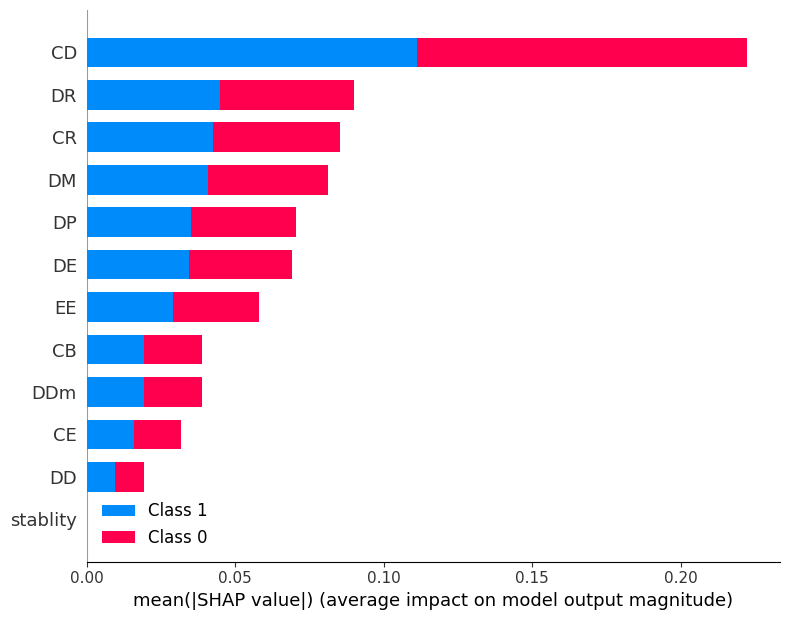

In [5]:
import matplotlib
# 可视化SHAP值
shap.summary_plot(shap_values, data)


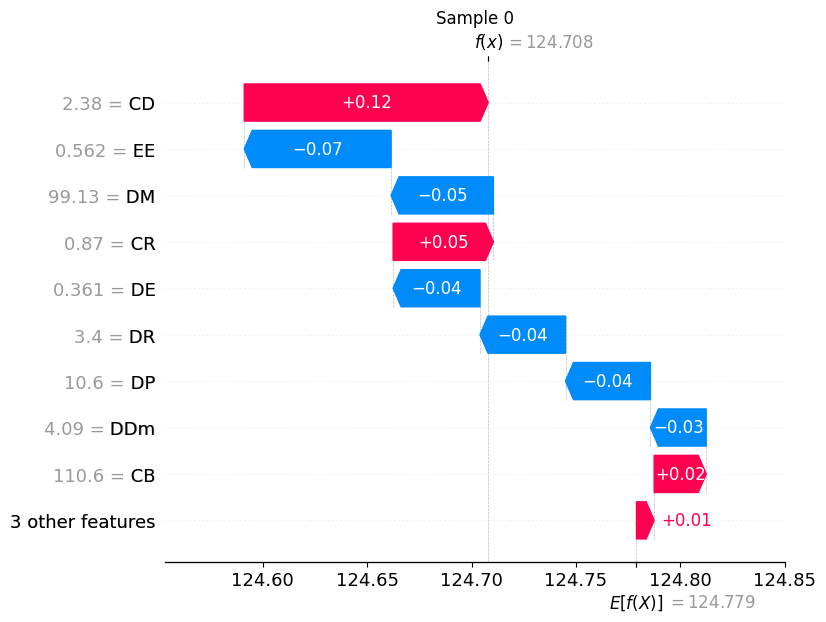

<Figure size 640x480 with 0 Axes>

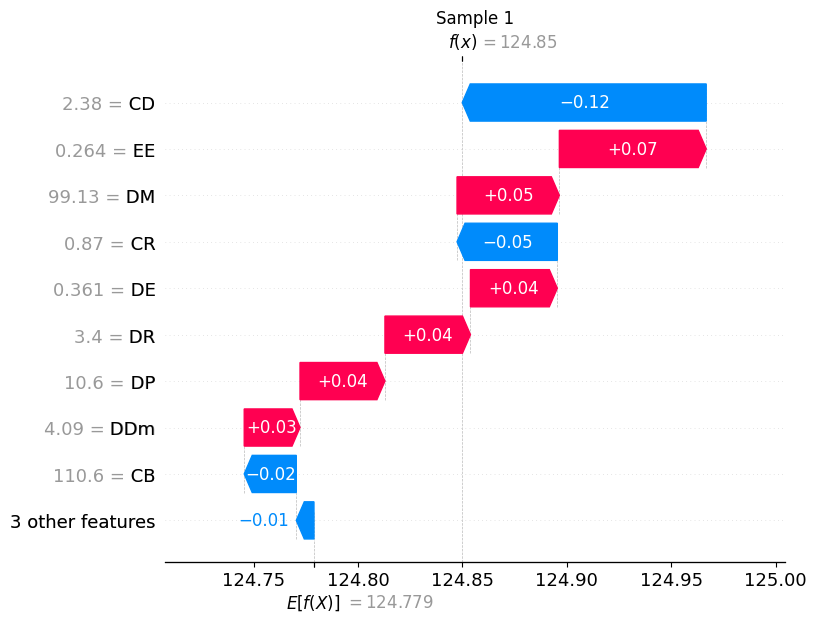

<Figure size 640x480 with 0 Axes>

In [6]:
## 计算 SHAP 值
import matplotlib.pyplot as plt
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data)

# 将 SHAP 值转换为 Explanation 对象列表
shap_values = [shap.Explanation(values=sv, base_values=np.mean(data, axis=0), data=data.iloc[[i]]) for i, sv in enumerate(shap_values)]

# 绘制每个样本的特征重要性瀑布图
for i, sv in enumerate(shap_values):
    plt.title(f"Sample {i}")
    shap.waterfall_plot(sv[0], max_display=10)

   
    plt.savefig('瀑布图.png', bbox_inches='tight', dpi=300)
    plt.show()


In [7]:
import networkx as nx
# 创建一个空的有向图
G = nx.DiGraph()


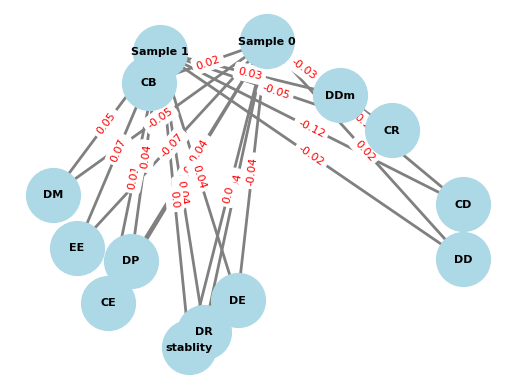

In [21]:
# 绘制力导向图
for i, sv in enumerate(shap_values):
    for j, (feature, value) in enumerate(zip(sv.data.columns, sv.values[0])):
        G.add_node(feature)
        G.add_node(f"Sample {i}")
        # G.add_edge(feature, f"Sample {i}", weight=value)
        G.add_edge(feature, f"Sample {i}", weight=round(value, 2))  # 保留三位小数

# 设置节点和边的颜色
node_color = 'lightblue'
edge_color = 'gray'

# 设置节点的大小
node_size = 1500

# 绘制力导向图
pos = nx.spring_layout(G, seed=5)
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size)
nx.draw_networkx_edges(G, pos, edge_color=edge_color, width=2)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red')
plt.axis('off')
plt.show()

In [9]:
import graphviz
from sklearn.tree import export_graphviz

In [10]:
 # 将决策树导出为DOT格式
dot_data = export_graphviz(model.estimators_[0], out_file=None, 
                           feature_names=data.columns[:-1], class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)

In [11]:
# 将DOT格式转换为绘图
graph = graphviz.Source(dot_data)

In [12]:
import os
os.environ["PATH"] += os.pathsep + 'E:\anaconda\envs\hyrenv2\Lib\site-packages\graphviz'

In [13]:
# 展示决策树状图
graph.render('decision_tree', format='png')

'decision_tree.png'

In [14]:
print(shap_values[0].shap

SyntaxError: incomplete input (3701000296.py, line 1)

(6840, 12)
